In [1]:
%pip install -q pandas-gpt

from IPython.display import clear_output, display
clear_output()

In [2]:
import openai
openai.api_key = input('Enter API key from (https://platform.openai.com/account/api-keys): ')
clear_output()

In [9]:
import pandas as pd
import pandas_gpt

df = pd.read_csv('https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977


In [10]:
df.ask('remove PII')

,Order ID,Product,Quantity Ordered,Price Each,Order Date
0,141234,iPhone,1.0,700.00,01/22/19 21:25
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59
...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39


In [11]:
df.ask('which day of the week had the most orders?')

'Tuesday'

In [12]:
df.ask('filter by purchases in Laurenchester, NY', verbose=True)


```python
import pandas as pd

def process(df):
    """
    Filter by purchases in Laurenchester, NY
    
    :param df: pandas DataFrame object
    :return: pandas DataFrame object containing purchases in Laurenchester, NY
    """
    # create mask to filter by purchases in Laurenchester, NY
    mask = df['Purchase Address'].str.contains('Laurenchester, NY')
    
    # apply mask to DataFrame and return filtered result
    return df[mask]
```


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684
140484,276018,Google Phone,1.0,600.00,10/24/19 01:46,"78382 Noah Stream Suite 585, North Laurenchest...",8086-9573-0018-6582,306-25-7380


In [13]:
df.ask.code('add a new Category column with value "cheap", "regular", or "expensive"')

import pandas as pd

def process(df):
    def get_category(price):
        if price <= 30:
            return "cheap"
        elif price <= 100:
            return "regular"
        else:
            return "expensive"
    
    df['Category'] = df['Price Each'].apply(get_category)
    return df



In [14]:
df = df.ask('add a new Category column with value "cheap", "regular", or "expensive"')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,Category
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008,expensive
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892,cheap
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943,cheap
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"23081 Kyle Crest, Laurenchester, NY 10177",9431-1332-2561-3939,678-46-9684,expensive
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"59764 Spears Mountains, Port Amanda, SC 29826",4788-2969-5170-6914,980-25-2977,cheap
...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"0918 Sellers Stravenue, Murrayport, VA 23529",6330-9667-7648-5375,326-43-8038,cheap
185946,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"8646 Higgins Road Apt. 673, East Luke, WI 54318",7928-0521-1139-8895,802-83-9528,cheap
185947,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"962 Mcbride Motorway Apt. 085, Williamshaven, ...",8809-4349-6427-8935,157-00-6893,expensive
185948,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"86305 Ricky Radial Apt. 414, Morachester, MO 6...",0526-5467-8300-3974,714-39-2575,cheap


In [15]:
most_popular = df.ask('what are the top 10 most popular products, as a table')
most_popular

<string>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


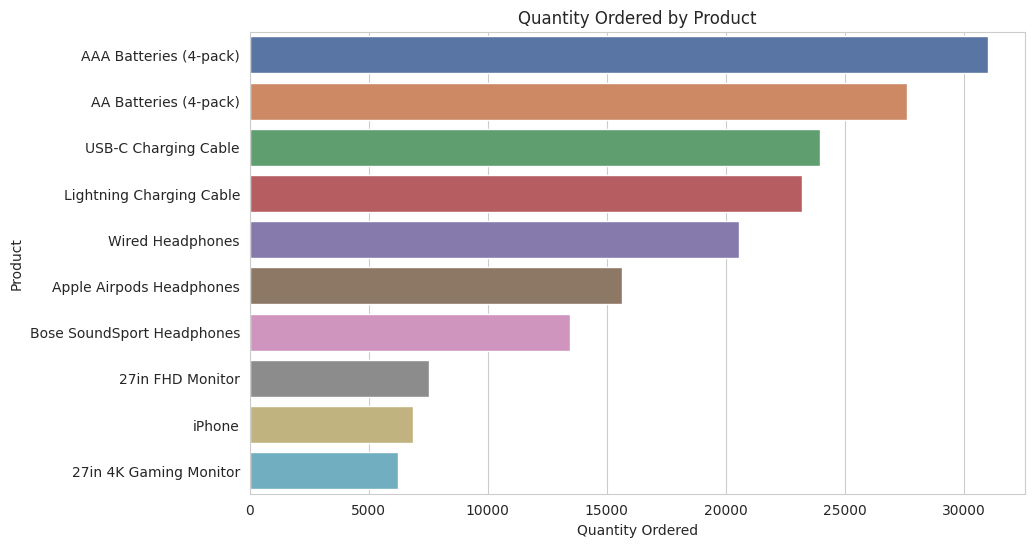

In [19]:
most_popular.ask('horizontal bar plot with nice style')

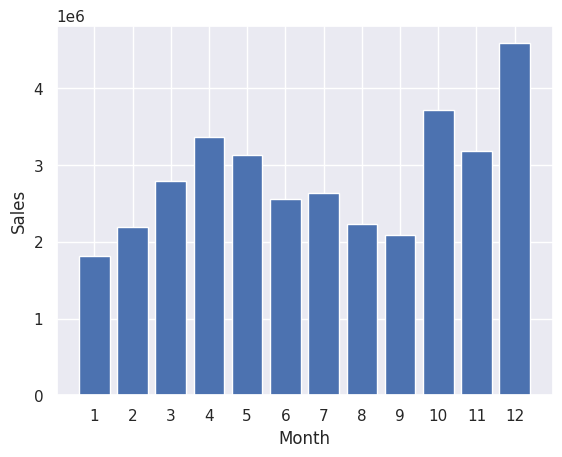

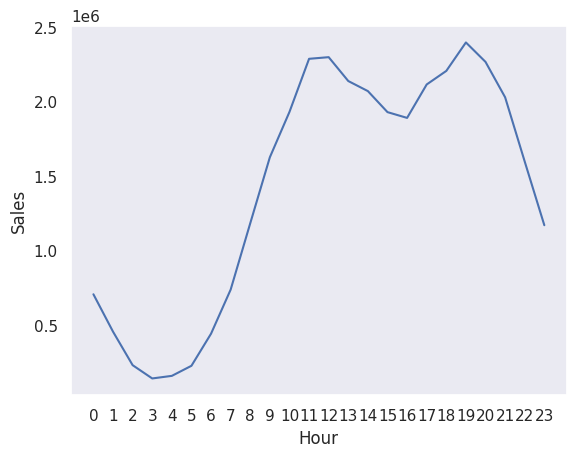

In [22]:
df.ask('plot monthly and hourly sales')